In [85]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from itertools import combinations
from scipy.stats import ttest_ind

pd.set_option('display.max_rows', 50)  # показывать больше строк
pd.set_option('display.max_columns', 50)  # показывать больше колонок

unicef = pd.read_csv('stud_math.xls')

In [ ]:
# Показать выбросы
def get_outliers(col):
    IQR = unicef[col].quantile(0.75) - unicef[col].quantile(0.25)
    perc25 = unicef[col].quantile(0.25)
    perc75 = unicef[col].quantile(0.75)
    print('25-й перцентиль: {},'.format(perc25), '75-й перцентиль: {},'.format(perc75),
          "IQR: {}, ".format(IQR), "Границы выбросов: [{f}, {l}].".format(f=perc25 - 1.5*IQR, l=perc75 + 1.5*IQR))

In [ ]:
# построит boxplot
def get_boxplot(column):
    fig, ax = plt.subplots(figsize = (14, 4))
    sns.boxplot(x=column, y='score', 
                data=unicef.loc[unicef.loc[:, column].isin(unicef.loc[:, column].value_counts().index[:10])],
               ax=ax)
    plt.xticks(rotation=45)
    ax.set_title('Boxplot for ' + column)
    plt.show()

In [86]:
display(unicef.head(10))
unicef.info() 

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,"studytime, granular",higher,internet,romantic,famrel,freetime,goout,health,absences,score
0,GP,F,18,U,NaN,A,4.0,4.0,at_home,teacher,course,mother,2.0,2.0,0.0,yes,no,no,no,yes,-6.0,yes,NaN,no,4.0,3.0,4.0,3.0,6.0,30.0
1,GP,F,17,U,GT3,NaN,1.0,1.0,at_home,other,course,father,1.0,2.0,0.0,no,yes,no,no,no,-6.0,yes,yes,no,5.0,3.0,3.0,3.0,4.0,30.0
2,GP,F,15,U,LE3,T,1.0,1.0,at_home,other,other,mother,1.0,2.0,3.0,yes,no,NaN,no,yes,-6.0,yes,yes,NaN,4.0,3.0,2.0,3.0,10.0,50.0
3,GP,F,15,U,GT3,T,4.0,2.0,health,NaN,home,mother,1.0,3.0,0.0,no,yes,yes,yes,yes,-9.0,yes,yes,yes,3.0,2.0,2.0,5.0,2.0,75.0
4,GP,F,16,U,GT3,T,3.0,3.0,other,other,home,father,1.0,2.0,0.0,no,yes,yes,no,yes,-6.0,yes,no,no,4.0,3.0,2.0,5.0,4.0,50.0
5,GP,M,16,U,LE3,T,4.0,3.0,services,other,reputation,mother,1.0,2.0,0.0,no,yes,yes,yes,yes,-6.0,yes,yes,no,5.0,4.0,2.0,5.0,10.0,75.0
6,GP,M,16,NaN,LE3,T,2.0,2.0,other,other,home,mother,1.0,2.0,0.0,no,no,no,no,yes,-6.0,yes,yes,no,4.0,4.0,4.0,3.0,0.0,55.0
7,GP,F,17,U,GT3,A,4.0,4.0,other,teacher,home,mother,2.0,2.0,0.0,yes,yes,no,no,yes,-6.0,yes,no,no,4.0,1.0,4.0,1.0,6.0,30.0
8,GP,M,15,U,LE3,A,3.0,2.0,services,other,home,mother,1.0,2.0,0.0,no,yes,yes,no,yes,-6.0,yes,yes,no,NaN,2.0,2.0,1.0,0.0,95.0
9,GP,M,15,U,NaN,NaN,3.0,4.0,other,other,home,mother,1.0,2.0,0.0,no,yes,yes,yes,yes,-6.0,yes,yes,no,5.0,5.0,1.0,5.0,0.0,75.0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 30 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   school               395 non-null    object 
 1   sex                  395 non-null    object 
 2   age                  395 non-null    int64  
 3   address              378 non-null    object 
 4   famsize              368 non-null    object 
 5   Pstatus              350 non-null    object 
 6   Medu                 392 non-null    float64
 7   Fedu                 371 non-null    float64
 8   Mjob                 376 non-null    object 
 9   Fjob                 359 non-null    object 
 10  reason               378 non-null    object 
 11  guardian             364 non-null    object 
 12  traveltime           367 non-null    float64
 13  studytime            388 non-null    float64
 14  failures             373 non-null    float64
 15  schoolsup            386 non-null    obj

In [ ]:
# удаление ненужного числового столбца
unicef.drop(['studytime, granular'], axis=1, inplace=True)

1. Замена Nan числовых столбцов на медиану, а строковых на моду

In [87]:
for col in unicef.columns:
    if unicef[col].dtype == 'int64' or unicef[col].dtype == 'float64':
        unicef[col].fillna(unicef[col].median(), inplace=True)
    else:
        unicef[col].fillna(unicef[col].mode()[0], inplace=True)
unicef.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 30 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   school               395 non-null    object 
 1   sex                  395 non-null    object 
 2   age                  395 non-null    int64  
 3   address              395 non-null    object 
 4   famsize              395 non-null    object 
 5   Pstatus              395 non-null    object 
 6   Medu                 395 non-null    float64
 7   Fedu                 395 non-null    float64
 8   Mjob                 395 non-null    object 
 9   Fjob                 395 non-null    object 
 10  reason               395 non-null    object 
 11  guardian             395 non-null    object 
 12  traveltime           395 non-null    float64
 13  studytime            395 non-null    float64
 14  failures             395 non-null    float64
 15  schoolsup            395 non-null    obj

2. Посмотрите на распределение признака для числовых переменных, устраните выбросы.

count    395.000000
mean      16.696203
std        1.276043
min       15.000000
25%       16.000000
50%       17.000000
75%       18.000000
max       22.000000
Name: age, dtype: float64

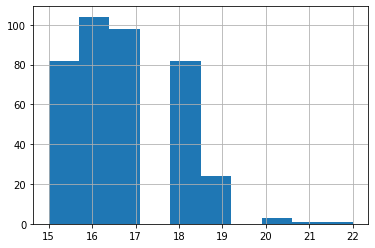

In [88]:
unicef.age.hist()
unicef.age.describe()

In [91]:
get_outliers('age')

25-й перцентиль: 16.0, 75-й перцентиль: 18.0, IQR: 2.0,  Границы выбросов: [13.0, 21.0].


Удаляем верхний выброс

In [92]:
unicef = unicef.loc[unicef.age <= 21]

count    394.000000
mean       2.751269
std        1.095473
min        0.000000
25%        2.000000
50%        3.000000
75%        4.000000
max        4.000000
Name: Medu, dtype: float64

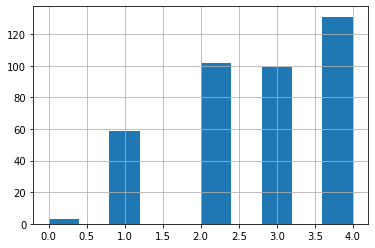

In [94]:
unicef.Medu.hist()
unicef.Medu.describe()

count    394.000000
mean       2.581218
std        2.166070
min        0.000000
25%        2.000000
50%        2.000000
75%        3.000000
max       40.000000
Name: Fedu, dtype: float64

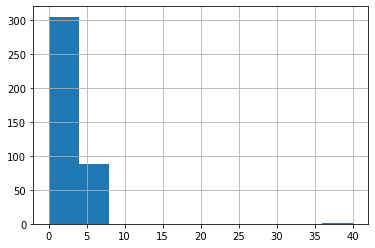

In [95]:
unicef.Fedu.hist()
unicef.Fedu.describe()

Есть выбросы, заменим медианой, все что больше 5

In [96]:
get_outliers('Fedu')

25-й перцентиль: 2.0, 75-й перцентиль: 3.0, IQR: 1.0,  Границы выбросов: [0.5, 4.5].


In [97]:
unicef.loc[unicef.Fedu > 5] = unicef['Fedu'].median();

count    394.000000
mean       2.484772
std        1.058599
min        0.000000
25%        2.000000
50%        2.000000
75%        3.000000
max        4.000000
Name: Fedu, dtype: float64

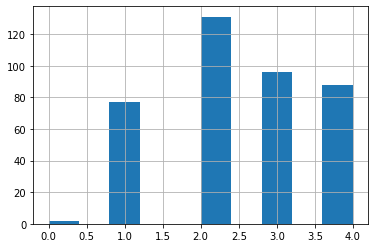

In [98]:
unicef.Fedu.hist()
unicef.Fedu.describe()

count    394.000000
mean       1.406091
std        0.674934
min        1.000000
25%        1.000000
50%        1.000000
75%        2.000000
max        4.000000
Name: traveltime, dtype: float64

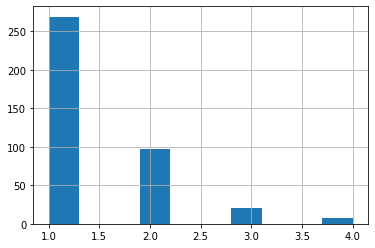

In [99]:
unicef.traveltime.hist()
unicef.traveltime.describe()

count    394.000000
mean       2.038071
std        0.832588
min        1.000000
25%        1.000000
50%        2.000000
75%        2.000000
max        4.000000
Name: studytime, dtype: float64

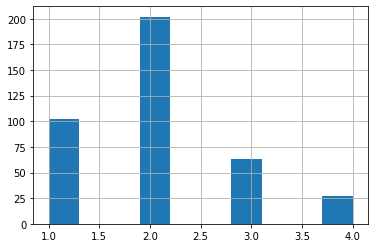

In [100]:
unicef.studytime.hist()
unicef.studytime.describe()

count    394.000000
mean       0.317259
std        0.719313
min        0.000000
25%        0.000000
50%        0.000000
75%        0.000000
max        3.000000
Name: failures, dtype: float64

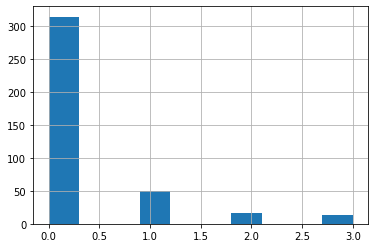

In [101]:
unicef.failures.hist()
unicef.failures.describe()

count    394.000000
mean       2.038071
std        0.832588
min        1.000000
25%        1.000000
50%        2.000000
75%        2.000000
max        4.000000
Name: studytime, dtype: float64

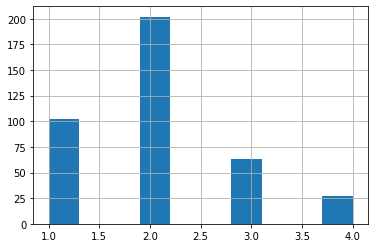

In [102]:
unicef.studytime.hist()
unicef.studytime.describe()

count    394.000000
mean       0.317259
std        0.719313
min        0.000000
25%        0.000000
50%        0.000000
75%        0.000000
max        3.000000
Name: failures, dtype: float64

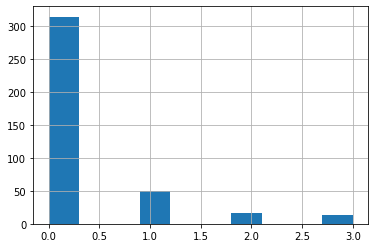

In [103]:
unicef.failures.hist()
unicef.failures.describe()

count    394.000000
mean       0.317259
std        0.719313
min        0.000000
25%        0.000000
50%        0.000000
75%        0.000000
max        3.000000
Name: failures, dtype: float64

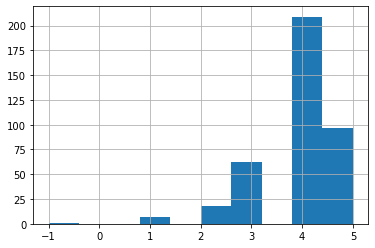

In [105]:
unicef.famrel.hist()
unicef.failures.describe()

замена неправильных значений на медиану

In [106]:
unicef.loc[unicef.famrel < 1] = unicef['famrel'].median();

count    394.000000
mean       0.322335
std        0.738032
min        0.000000
25%        0.000000
50%        0.000000
75%        0.000000
max        4.000000
Name: failures, dtype: float64

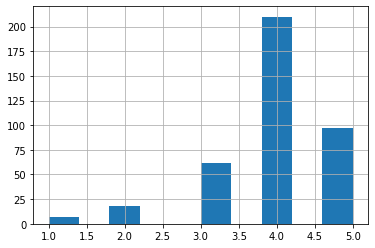

In [107]:
unicef.famrel.hist()
unicef.failures.describe()

count    394.000000
mean       3.228426
std        0.980006
min        1.000000
25%        3.000000
50%        3.000000
75%        4.000000
max        5.000000
Name: freetime, dtype: float64

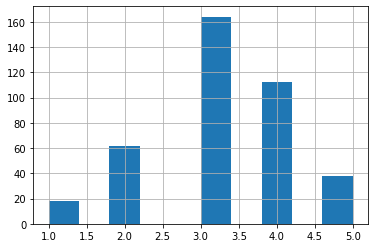

In [108]:
unicef.freetime.hist()
unicef.freetime.describe()

count    394.000000
mean       3.228426
std        0.980006
min        1.000000
25%        3.000000
50%        3.000000
75%        4.000000
max        5.000000
Name: freetime, dtype: float64

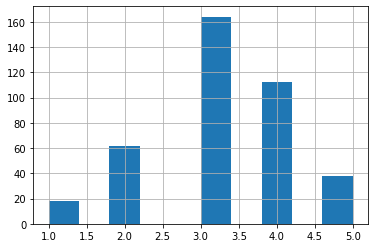

In [109]:
unicef.freetime.hist()
unicef.freetime.describe()

count    394.000000
mean       3.104061
std        1.101391
min        1.000000
25%        2.000000
50%        3.000000
75%        4.000000
max        5.000000
Name: goout, dtype: float64

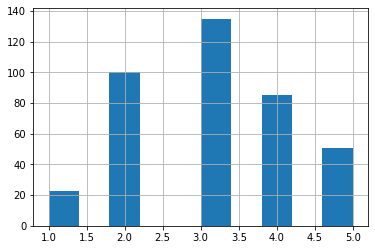

In [110]:
unicef.goout.hist()
unicef.goout.describe()

count    394.000000
mean       3.548223
std        1.368106
min        1.000000
25%        3.000000
50%        4.000000
75%        5.000000
max        5.000000
Name: health, dtype: float64

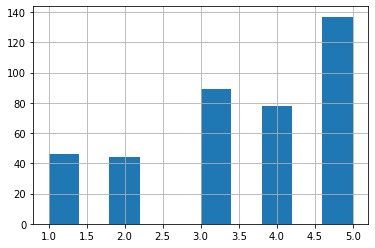

In [111]:
unicef.health.hist()
unicef.health.describe()

count    394.000000
mean       7.126904
std       23.135933
min        0.000000
25%        0.000000
50%        4.000000
75%        8.000000
max      385.000000
Name: absences, dtype: float64

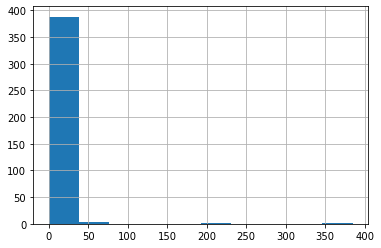

In [112]:
unicef.absences.hist()
unicef.absences.describe()

Выбросы удалять не буду, т.к ребенок вообще может редко появляться в школе

count    394.000000
mean      52.096447
std       23.024400
min        0.000000
25%       40.000000
50%       55.000000
75%       70.000000
max      100.000000
Name: score, dtype: float64

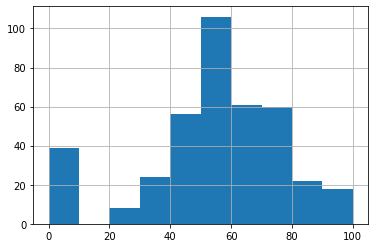

In [114]:
unicef.score.hist()
unicef.score.describe()

аномально низкие значения у 0, может это ученики, которые много пропустили

In [116]:
get_outliers('score')

25-й перцентиль: 40.0, 75-й перцентиль: 70.0, IQR: 30.0,  Границы выбросов: [-5.0, 115.0].


3. Оцените количество уникальных значений для номинативных переменных.

In [117]:
display(pd.DataFrame(unicef.school.value_counts()))
print("Уникальных значений:", unicef.school.nunique())
unicef.loc[:, ['school']].info()

,school
GP,346
MS,46
4.0,1
2.0,1


Уникальных значений: 4
<class 'pandas.core.frame.DataFrame'>
Int64Index: 394 entries, 0 to 394
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   school  394 non-null    object
dtypes: object(1)
memory usage: 6.2+ KB


удаляем битые строки

In [118]:
unicef = unicef.drop(unicef.loc[unicef['school'] == 4.0].index)

In [119]:
unicef = unicef.drop(unicef.loc[unicef['school'] == 2.0].index)

In [120]:
display(pd.DataFrame(unicef.sex.value_counts()))
print("Уникальных значений:", unicef.sex.nunique())
unicef.loc[:, ['sex']].info()

,sex
F,206
M,186


Уникальных значений: 2
<class 'pandas.core.frame.DataFrame'>
Int64Index: 392 entries, 0 to 394
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   sex     392 non-null    object
dtypes: object(1)
memory usage: 6.1+ KB


In [121]:
display(pd.DataFrame(unicef.address.value_counts()))
print("Уникальных значений:", unicef.address.nunique())
unicef.loc[:, ['address']].info()

,address
U,309
R,83


Уникальных значений: 2
<class 'pandas.core.frame.DataFrame'>
Int64Index: 392 entries, 0 to 394
Data columns (total 1 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   address  392 non-null    object
dtypes: object(1)
memory usage: 6.1+ KB


In [122]:
display(pd.DataFrame(unicef.famsize.value_counts()))
print("Уникальных значений:", unicef.famsize.nunique())
unicef.loc[:, ['famsize']].info()

,famsize
GT3,285
LE3,107


Уникальных значений: 2
<class 'pandas.core.frame.DataFrame'>
Int64Index: 392 entries, 0 to 394
Data columns (total 1 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   famsize  392 non-null    object
dtypes: object(1)
memory usage: 6.1+ KB


In [123]:
display(pd.DataFrame(unicef.Pstatus.value_counts()))
print("Уникальных значений:", unicef.Pstatus.nunique())
unicef.loc[:, ['Pstatus']].info()

,Pstatus
T,356
A,36


Уникальных значений: 2
<class 'pandas.core.frame.DataFrame'>
Int64Index: 392 entries, 0 to 394
Data columns (total 1 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Pstatus  392 non-null    object
dtypes: object(1)
memory usage: 6.1+ KB


In [124]:
display(pd.DataFrame(unicef.Mjob.value_counts()))
print("Уникальных значений:", unicef.Mjob.nunique())
unicef.loc[:, ['Mjob']].info()

,Mjob
other,152
services,95
at_home,58
teacher,55
health,32


Уникальных значений: 5
<class 'pandas.core.frame.DataFrame'>
Int64Index: 392 entries, 0 to 394
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Mjob    392 non-null    object
dtypes: object(1)
memory usage: 6.1+ KB


In [125]:
display(pd.DataFrame(unicef.Fjob.value_counts()))
print("Уникальных значений:", unicef.Fjob.nunique())
unicef.loc[:, ['Fjob']].info()

,Fjob
other,232
services,100
teacher,29
at_home,16
health,15


Уникальных значений: 5
<class 'pandas.core.frame.DataFrame'>
Int64Index: 392 entries, 0 to 394
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Fjob    392 non-null    object
dtypes: object(1)
memory usage: 6.1+ KB


In [126]:
display(pd.DataFrame(unicef.reason.value_counts()))
print("Уникальных значений:", unicef.reason.nunique())
unicef.loc[:, ['reason']].info()

,reason
course,154
home,103
reputation,102
other,33


Уникальных значений: 4
<class 'pandas.core.frame.DataFrame'>
Int64Index: 392 entries, 0 to 394
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   reason  392 non-null    object
dtypes: object(1)
memory usage: 6.1+ KB


In [127]:
display(pd.DataFrame(unicef.guardian.value_counts()))
print("Уникальных значений:", unicef.guardian.nunique())
unicef.loc[:, ['guardian']].info()

,guardian
mother,279
father,85
other,28


Уникальных значений: 3
<class 'pandas.core.frame.DataFrame'>
Int64Index: 392 entries, 0 to 394
Data columns (total 1 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   guardian  392 non-null    object
dtypes: object(1)
memory usage: 6.1+ KB


In [129]:
display(pd.DataFrame(unicef.schoolsup.value_counts()))
print("Уникальных значений:", unicef.schoolsup.nunique())
unicef.loc[:, ['schoolsup']].info()

,schoolsup
no,341
yes,51


Уникальных значений: 2
<class 'pandas.core.frame.DataFrame'>
Int64Index: 392 entries, 0 to 394
Data columns (total 1 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   schoolsup  392 non-null    object
dtypes: object(1)
memory usage: 6.1+ KB


In [130]:
display(pd.DataFrame(unicef.famsup.value_counts()))
print("Уникальных значений:", unicef.famsup.nunique())
unicef.loc[:, ['famsup']].info()

,famsup
yes,256
no,136


Уникальных значений: 2
<class 'pandas.core.frame.DataFrame'>
Int64Index: 392 entries, 0 to 394
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   famsup  392 non-null    object
dtypes: object(1)
memory usage: 6.1+ KB


In [131]:
display(pd.DataFrame(unicef.paid.value_counts()))
print("Уникальных значений:", unicef.paid.nunique())
unicef.loc[:, ['paid']].info()

,paid
no,238
yes,154


Уникальных значений: 2
<class 'pandas.core.frame.DataFrame'>
Int64Index: 392 entries, 0 to 394
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   paid    392 non-null    object
dtypes: object(1)
memory usage: 6.1+ KB


In [132]:
display(pd.DataFrame(unicef.activities.value_counts()))
print("Уникальных значений:", unicef.activities.nunique())
unicef.loc[:, ['activities']].info()

,activities
yes,208
no,184


Уникальных значений: 2
<class 'pandas.core.frame.DataFrame'>
Int64Index: 392 entries, 0 to 394
Data columns (total 1 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   activities  392 non-null    object
dtypes: object(1)
memory usage: 6.1+ KB


In [133]:
display(pd.DataFrame(unicef.nursery.value_counts()))
print("Уникальных значений:", unicef.nursery.nunique())
unicef.loc[:, ['nursery']].info()

,nursery
yes,315
no,77


Уникальных значений: 2
<class 'pandas.core.frame.DataFrame'>
Int64Index: 392 entries, 0 to 394
Data columns (total 1 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   nursery  392 non-null    object
dtypes: object(1)
memory usage: 6.1+ KB


In [134]:
display(pd.DataFrame(unicef.higher.value_counts()))
print("Уникальных значений:", unicef.higher.nunique())
unicef.loc[:, ['higher']].info()

,higher
yes,374
no,18


Уникальных значений: 2
<class 'pandas.core.frame.DataFrame'>
Int64Index: 392 entries, 0 to 394
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   higher  392 non-null    object
dtypes: object(1)
memory usage: 6.1+ KB


In [135]:
display(pd.DataFrame(unicef.internet.value_counts()))
print("Уникальных значений:", unicef.internet.nunique())
unicef.loc[:, ['internet']].info()

,internet
yes,336
no,56


Уникальных значений: 2
<class 'pandas.core.frame.DataFrame'>
Int64Index: 392 entries, 0 to 394
Data columns (total 1 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   internet  392 non-null    object
dtypes: object(1)
memory usage: 6.1+ KB


In [136]:
display(pd.DataFrame(unicef.romantic.value_counts()))
print("Уникальных значений:", unicef.romantic.nunique())
unicef.loc[:, ['romantic']].info()

,romantic
no,269
yes,123


Уникальных значений: 2
<class 'pandas.core.frame.DataFrame'>
Int64Index: 392 entries, 0 to 394
Data columns (total 1 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   romantic  392 non-null    object
dtypes: object(1)
memory usage: 6.1+ KB


5. Корреляционный анализ количественных переменных

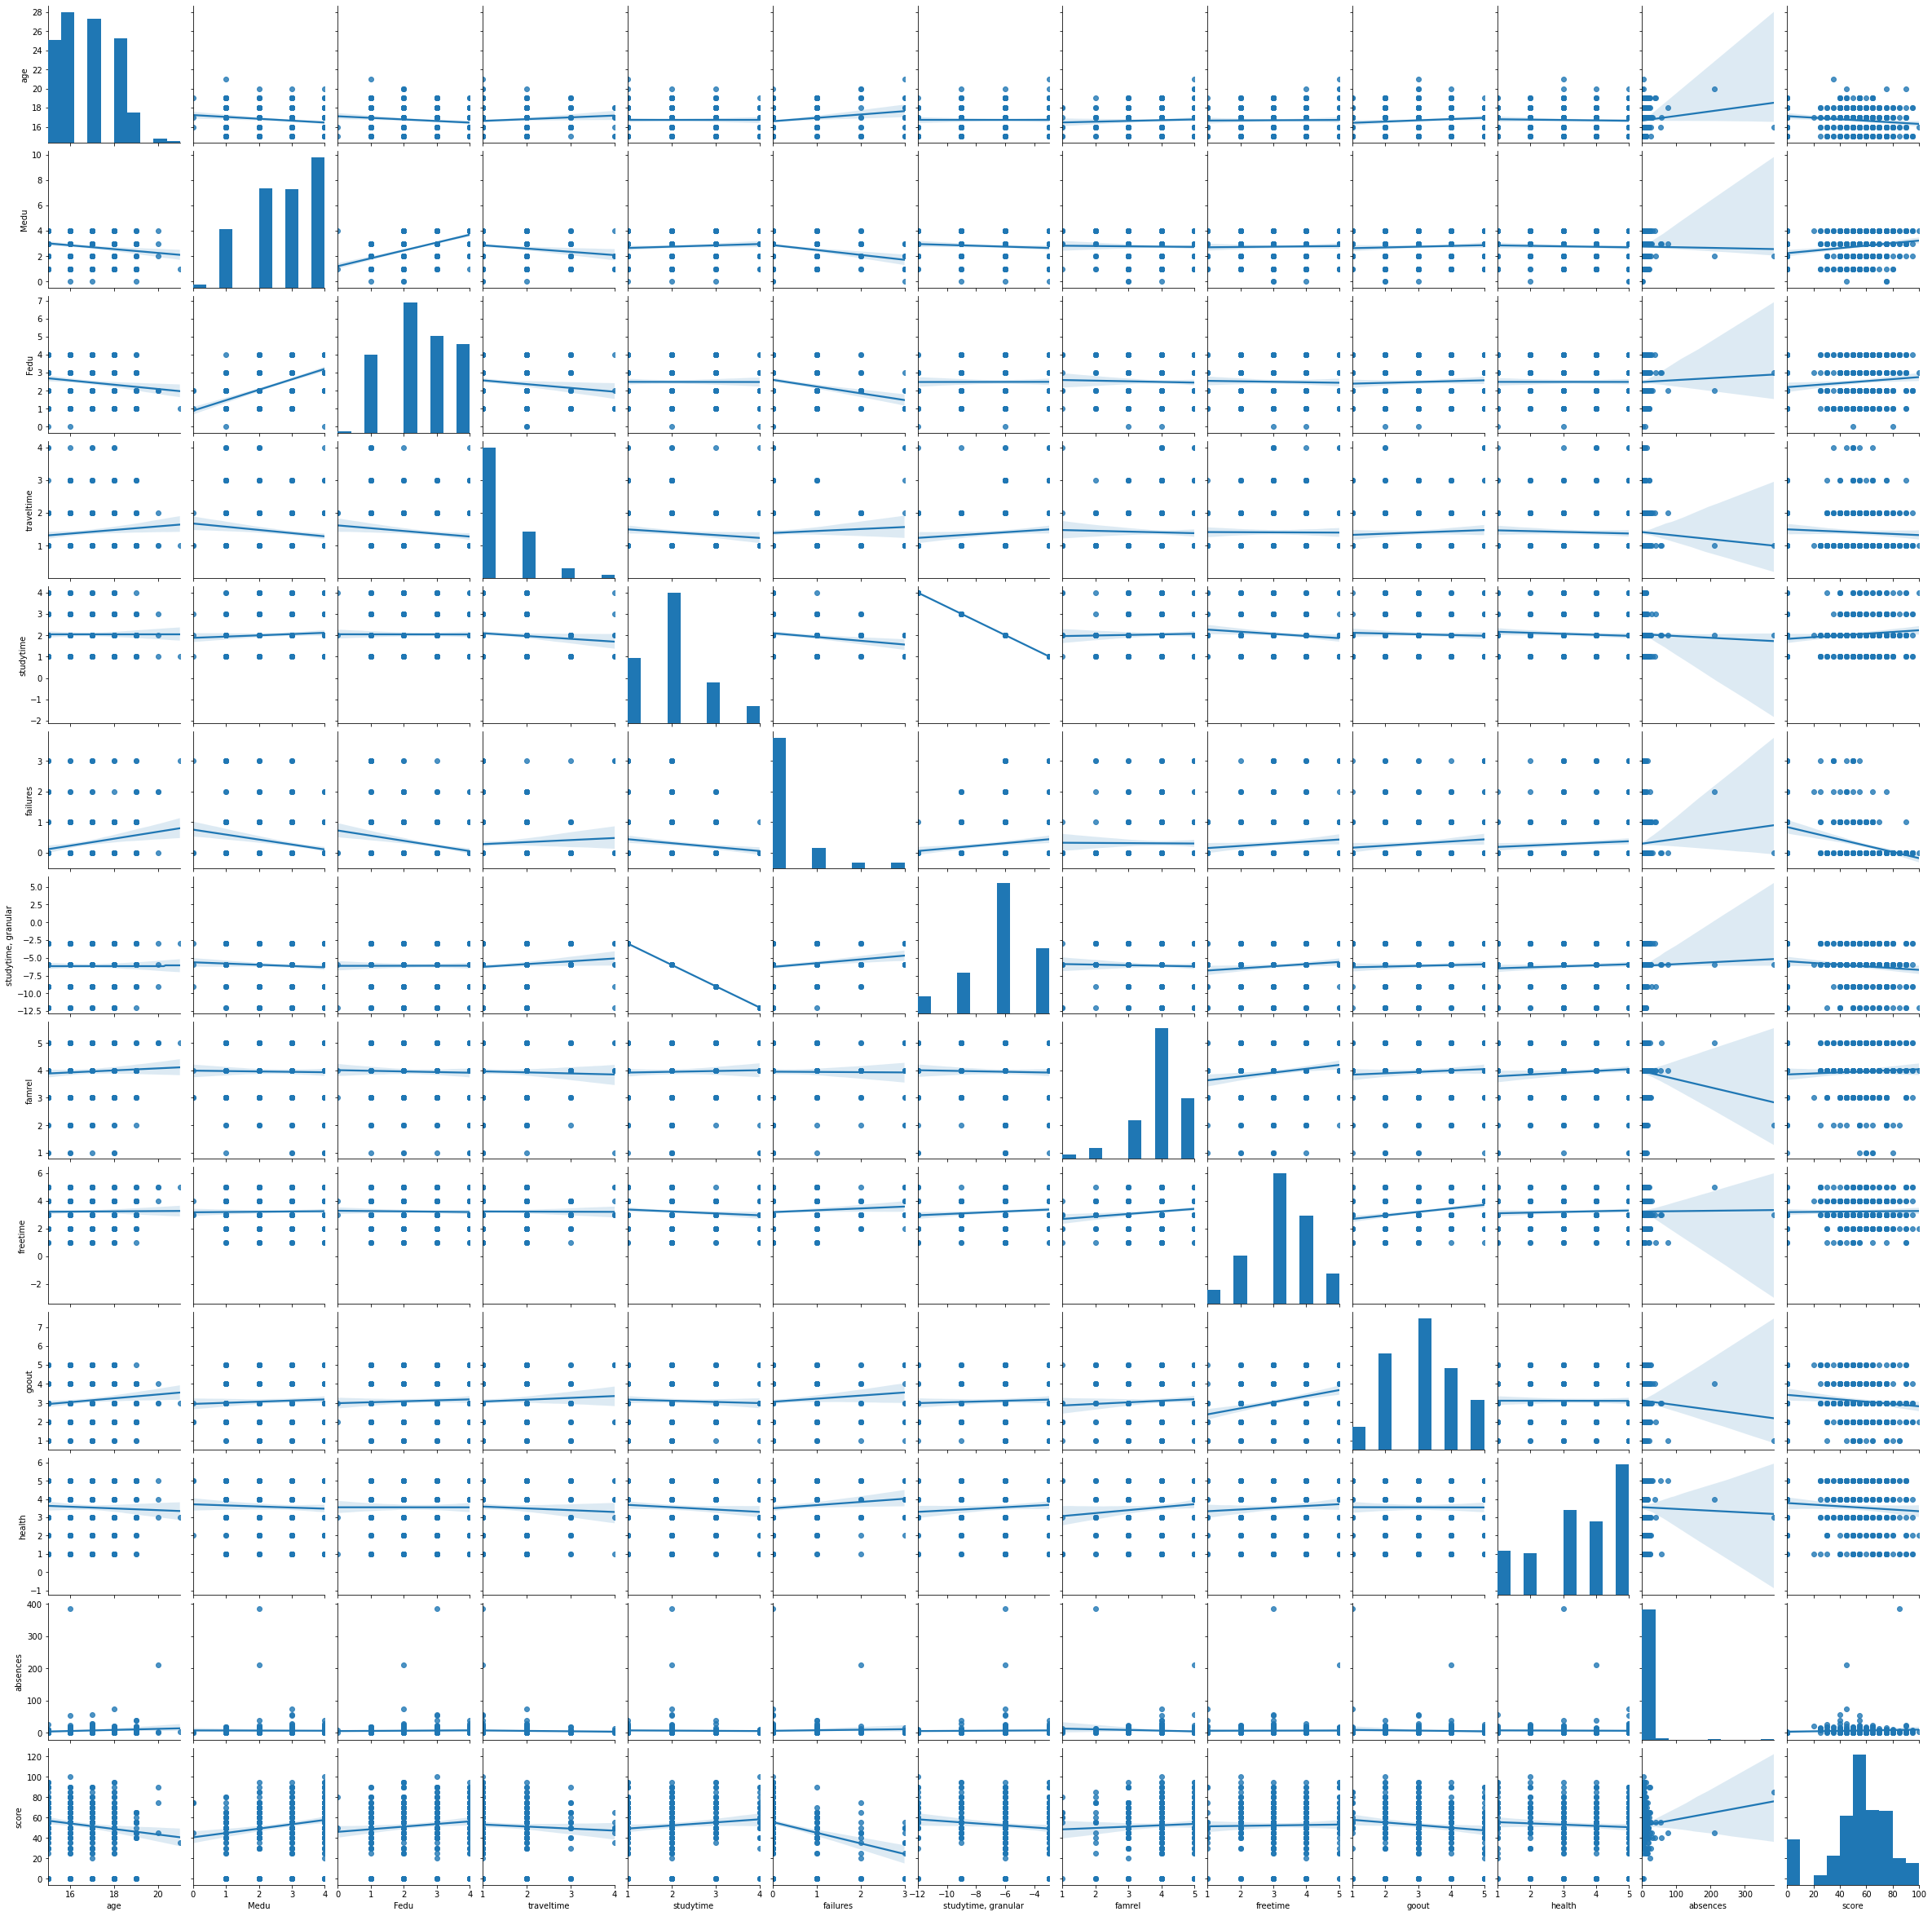

In [137]:
sns.pairplot(unicef, kind = 'reg')

In [143]:
unicef.corr()

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,health,absences,score
age,1.000000,-0.171498,-0.140057,0.101471,-0.000050,0.200608,0.054245,0.012560,0.114767,-0.043033,0.089700,-0.148872
Medu,-0.171498,1.000000,0.599564,-0.158940,0.078136,-0.250428,-0.018707,0.021514,0.059334,-0.047854,-0.010937,0.205965
Fedu,-0.140057,0.599564,1.000000,-0.133716,-0.002304,-0.250803,-0.028762,-0.024245,0.048191,-0.000431,0.023675,0.119613
traveltime,0.101471,-0.158940,-0.133716,1.000000,-0.106730,0.063465,-0.030326,-0.005815,0.059670,-0.048690,-0.036969,-0.059427
studytime,-0.000050,0.078136,-0.002304,-0.106730,1.000000,-0.150868,0.027913,-0.118049,-0.046457,-0.078068,-0.023213,0.110681
failures,0.200608,-0.250428,-0.250803,0.063465,-0.150868,1.000000,-0.007643,0.096264,0.105593,0.090185,0.051042,-0.326238
famrel,0.054245,-0.018707,-0.028762,-0.030326,0.027913,-0.007643,1.000000,0.159689,0.065046,0.102166,-0.079660,0.050459
freetime,0.012560,0.021514,-0.024245,-0.005815,-0.118049,0.096264,0.159689,1.000000,0.285676,0.069413,0.006717,0.018740
goout,0.114767,0.059334,0.048191,0.059670,-0.046457,0.105593,0.065046,0.285676,1.000000,-0.002699,-0.051347,-0.124762
health,-0.043033,-0.047854,-0.000431,-0.048690,-0.078068,0.090185,0.102166,0.069413,-0.002699,1.000000,-0.016346,-0.074670


Самая тесная связь у следующих признаков:
1. failures -0.326238
2. Medu 0.205965
3. age -0.148872
4. goout -0.124762
5. Fedu	0.119613
6. studytime 0.110681

Убираем слабо коррелированные признаки

In [145]:
unicef.drop(['traveltime', 'famrel', 'freetime', 'health', 'absences'], axis=1, inplace=True)

6. Анализ номинативных переменных

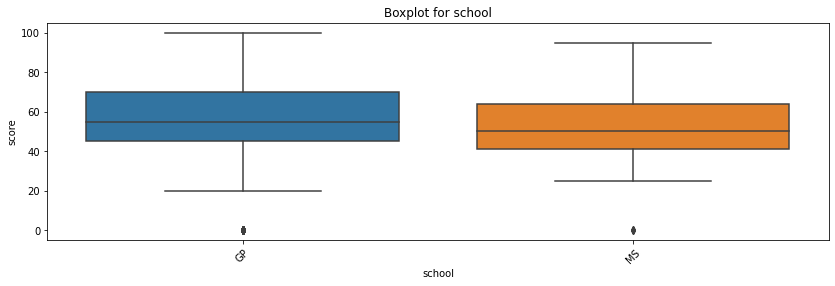

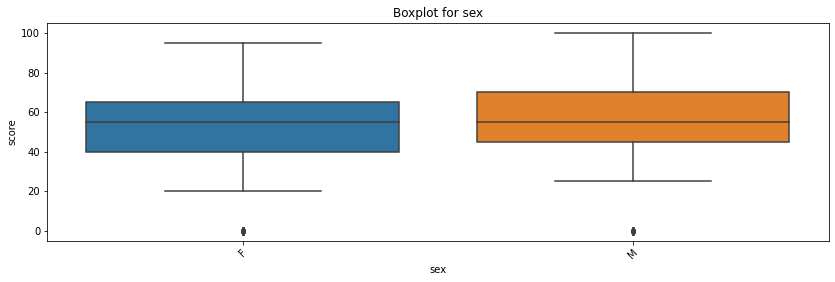

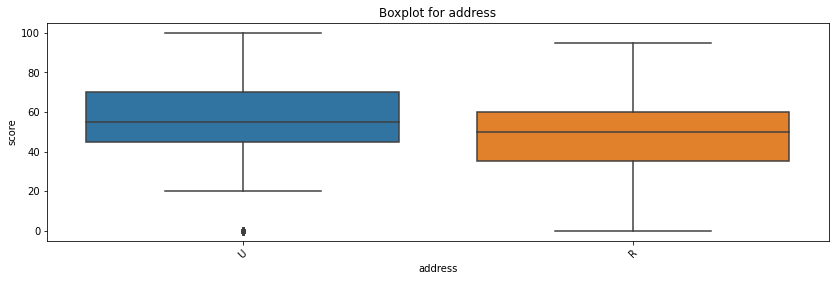

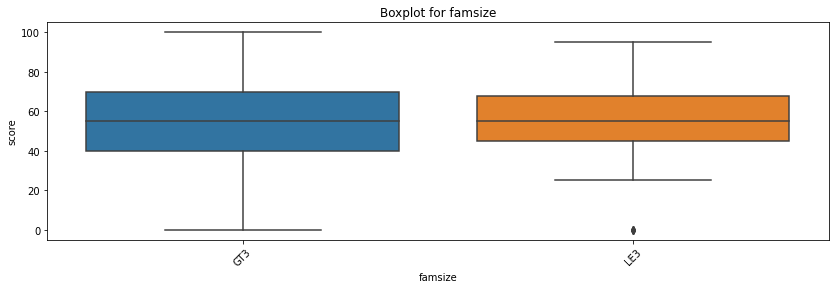

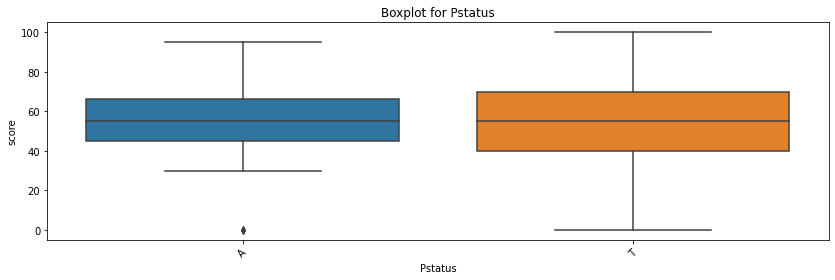

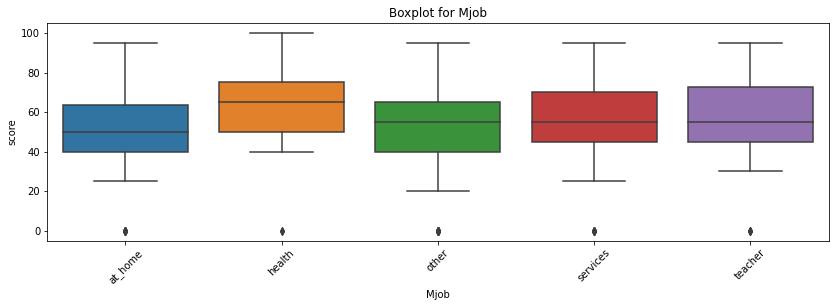

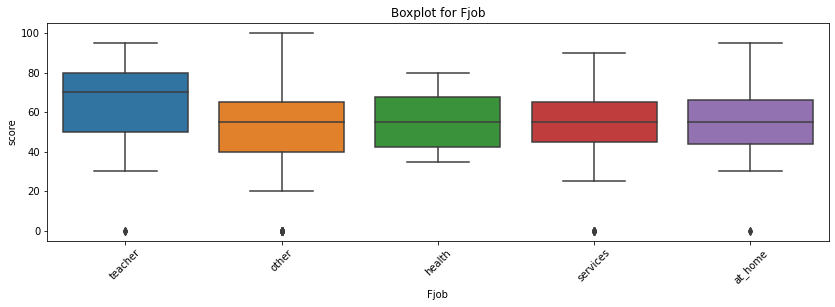

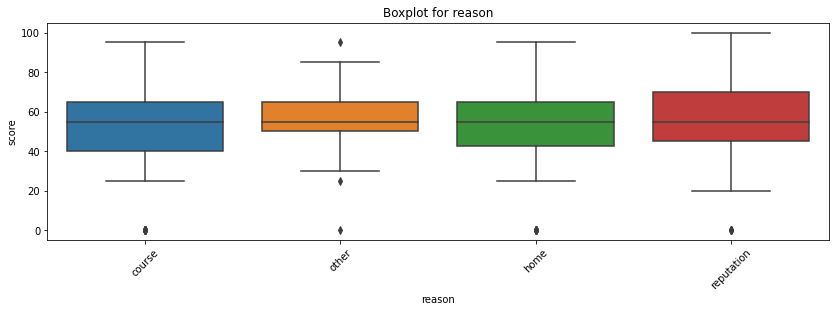

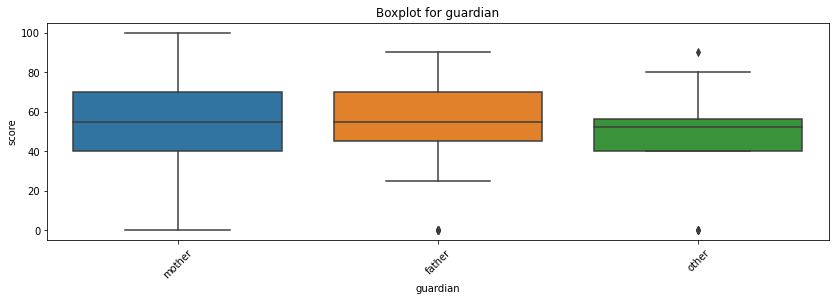

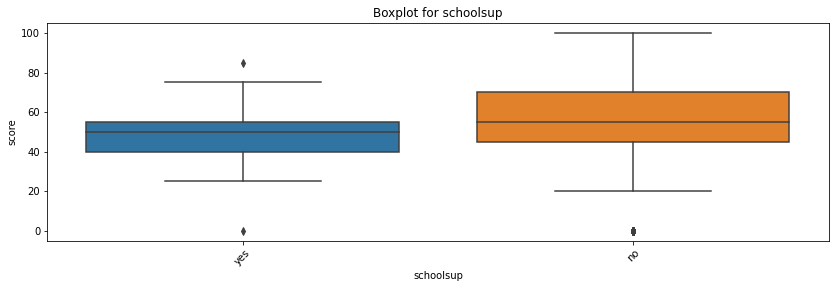

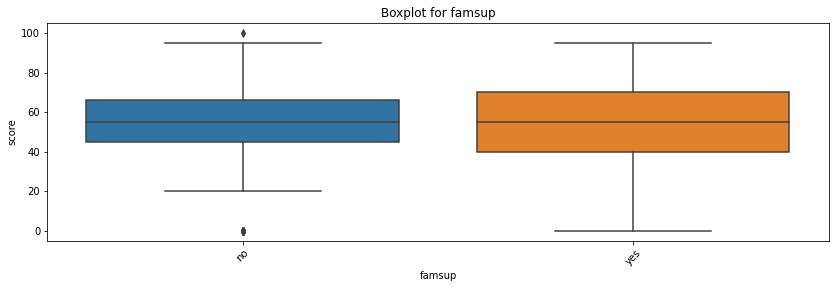

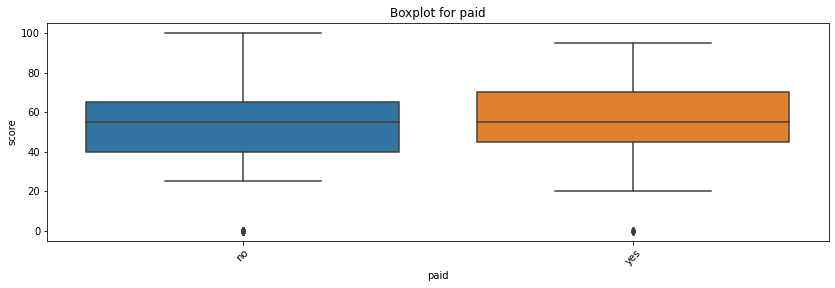

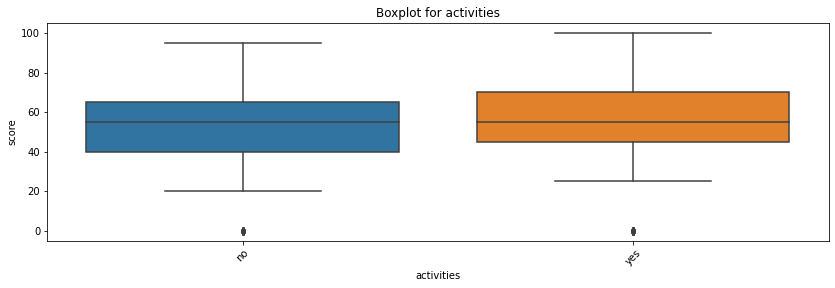

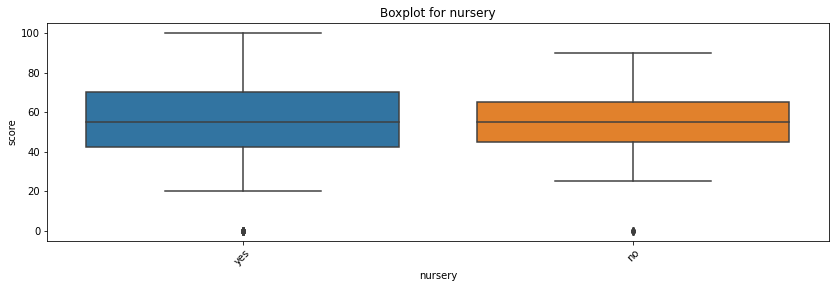

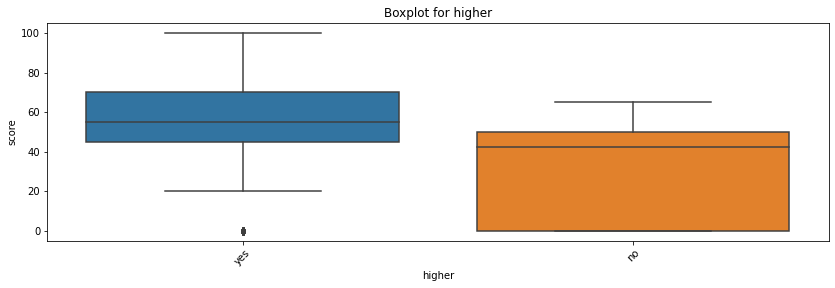

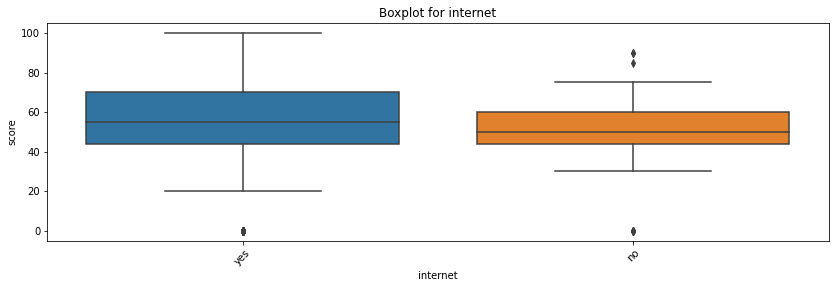

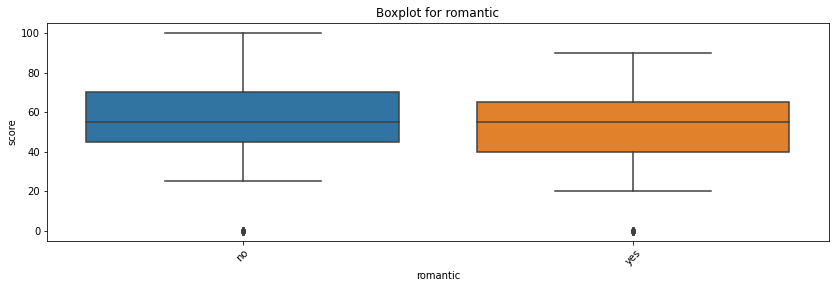

In [148]:
for col in ['school', 'sex', 'address', 'famsize', 'Pstatus', 'Mjob', 'Fjob', 'reason', 'guardian', 'schoolsup', 'famsup', 'paid',
            'activities', 'nursery',  'higher', 'internet', 'romantic']:
    get_boxplot(col)

In [ ]:
Выводы по номенативным признакам:
    1. Ученики в школе GP показывают более высокие результаты
    2. Мальчики получают лучше оценки по математике, чем девочки
    3. Городские лучше успевают, чем сельские
    4. Работа матери мказывается на успеваемости
    5. Работа отца сказывается на успеваемости
    6. Дополнительная образовательная поддержка сказывается на отметках
    7. Дополнительные платные занятия по математике улучшают показатели
    8. Дополнительные внеучебные занятия улучшают показатели
    9. higher - если хочет получить высшее образование, то учится намного лучше

Удаление более ненужных столбцов:

In [152]:
unicef.drop(['famsize', 'Pstatus', 'reason', 'guardian', 'famsup', 'nursery'], axis=1, inplace=True)

Выводы:

Качество данных вполне сносное, удалить пришлось несколько строк и заполнять некоторые значентя медианой
На успеваемость по математике влияют следующие факторы:

1. количество внеучебных неудач
2. Образование матери
3. Возраст 
4. Проведение времени с друзьями
5. Образование отца
6. Время на учёбу помимо школы в неделю
7. Сама школа - school
8. Мальчики получают лучше оценки по математике, чем девочки
9. Городские лучше успевают, чем сельские, тип адреса ученика
10. Работа матери 
11. Работа отца сказывается на успеваемости
12. Дополнительная образовательная поддержка сказывается на отметках
13. Дополнительные платные занятия по математике улучшают показатели
14. Дополнительные внеучебные занятия улучшают показатели
15. higher - если хочет получить высшее образование, то учится намного лучше


